## TRAFFIC SIGN CLASSIFICATION USING LeNet Deep Network Architecture based Convolutional Neural Networks(CNNs):

## The dataset contains 43 different classes of images.
# Classes are as listed below:
(0, b'Speed limit (20km / h)' )
(1, b'Speed limit (30km / h)' )
(2, b'Speed limit (50km / h)' )
(3, b'Speed limit (60km / h)' )
(4, b'Speed limit (70km / h)' )
(5, b'Speed limit (80km / h)' )
(6, b'End of speed limit (80km / h)' )
(7, b'Speed limit (100km / h)' )
(8, b'Speed limit (120km / h)' )
(9, b'No passing')
(10, b'No passing for vehicles over 3.5 metric tons')
(11, b'Right-of-way at the next intersection') 
(12, b'Priority road')
(13, b'Yield')
(14, b'Stop')
(15, b'No vehicles')
(16, b'Vehicles over 3.5 metric tons prohibited')
(17, b'No entry') 
(18, b'General caution') 
(19, b'Dangerous curve to the left')
(20, b'Dangerous curve to the right') 
(21, b'Double curve')
(22, b'Bumpy road')
(23, b'Slippery road')
(24, b'Road narrows on the right') 
(25, b'Road work')
(26, b'Traffic signals') 
(27, b'Pedestrians')
(28, b'Children crossing')
(29, b'Bicycles crossing') 
(30, b'Beware of ice/snow')
(31, b'Wild animals crossing')
(32, b'End of all speed and passing limits') 
(33, b'Turn right ahead') 
(34, b'Turn left ahead')
(35, b'Ahead only') 
(36, b'Go straight or right')
(37, b'Go straight or left') 
(38, b'Keep right') 
(39, b'Keep left')
(40, b'Roundabout mandatory')
(41, b'End of no passing')
(42, b'End of no passing by vehicles over 3.5 metric tons')

## Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Load Dataset

In [ ]:
with open("train.p", mode='rb') as training_data:
  train = pickle.load(training_data)

with open("valid.p", mode='rb') as validation_data:
  valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
  test = pickle.load(testing_data)

## Initialize features and labels

In [5]:
X_train , y_train = train['features'], train['labels']
X_validation , y_validation = valid['features'], valid['labels']
X_test , y_test = test['features'] , test['labels']


In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

In [8]:
X_validation.shape

(4410, 32, 32, 3)

In [9]:
y_validation.shape

(4410,)

In [10]:
X_test.shape

(12630, 32, 32, 3)

In [11]:
y_test.shape

(12630,)

## Visualization of Data

36

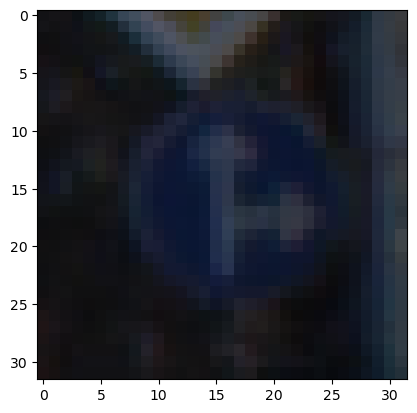

In [12]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

17

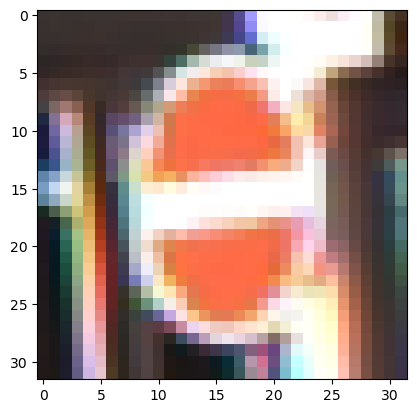

In [11]:
i = 4000
plt.imshow(X_validation[i])
y_validation[i]

11

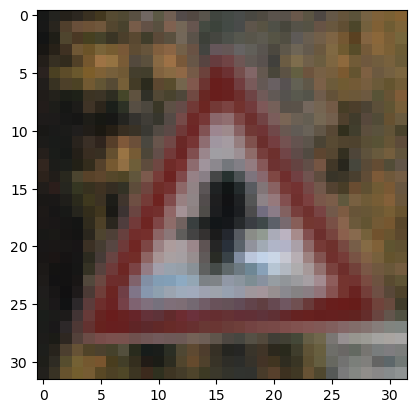

In [13]:
i = 3000
plt.imshow(X_test[i])
y_test[i]

26

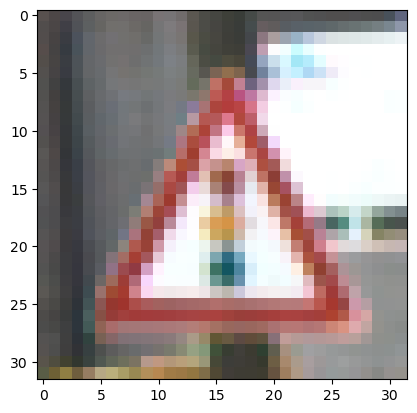

In [14]:
i = 5000
plt.imshow(X_test[i])
y_test[i]

## Data Shuffling

In [15]:
from sklearn.utils import shuffle
X_train , y_train = shuffle(X_train , y_train)

## # Convert Images to Grayscale 

In [16]:
X_train_grey = np.sum(X_train/3 , axis = 3 , keepdims = True)
X_test_grey = np.sum(X_test/3 , axis = 3 , keepdims = True)
X_validation_grey = np.sum(X_validation/3 , axis = 3 , keepdims = True)

In [17]:
X_train_grey.shape

(34799, 32, 32, 1)

In [18]:
X_test_grey.shape

(12630, 32, 32, 1)

In [19]:
X_validation_grey.shape

(4410, 32, 32, 1)

## Data Normalization

In [20]:
X_train_grey_norm = (X_train_grey - 128)/128
X_test_grey_norm = (X_test_grey - 128)/128
X_validation_grey_norm = (X_validation_grey - 128)/128

In [21]:
X_train_grey_norm

array([[[[-0.18229167],
         [ 0.140625  ],
         [-0.24479167],
         ...,
         [ 0.1875    ],
         [-0.05989583],
         [-0.13802083]],

        [[-0.05729167],
         [-0.01822917],
         [-0.33854167],
         ...,
         [-0.23697917],
         [-0.1015625 ],
         [-0.2734375 ]],

        [[ 0.0234375 ],
         [-0.17447917],
         [-0.35677083],
         ...,
         [-0.21614583],
         [-0.22395833],
         [-0.34895833]],

        ...,

        [[-0.00520833],
         [ 0.06510417],
         [-0.19270833],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.27604167],
         [ 0.625     ],
         [ 0.4296875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.4140625 ],
         [ 0.81510417],
         [ 0.90364583],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]]],


       [[[ 0.38020833],


## Visualize Greyscale and Normalized Data

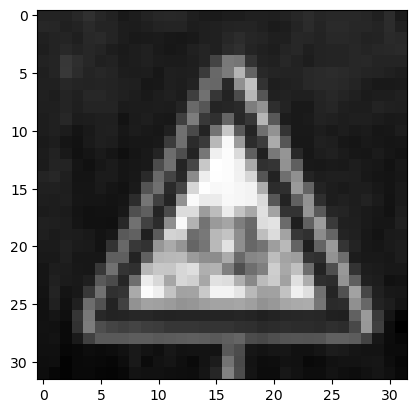

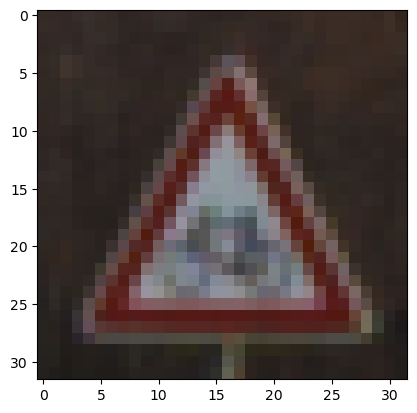

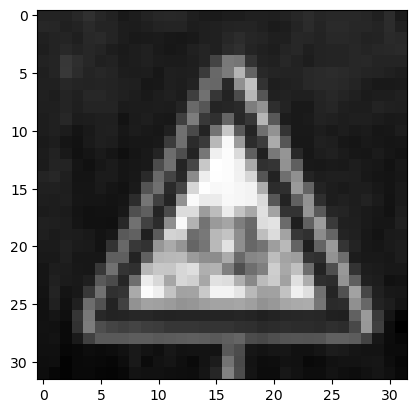

In [48]:
i = 1000
plt.imshow(X_train_grey[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_grey_norm[i].squeeze(),cmap = 'gray')

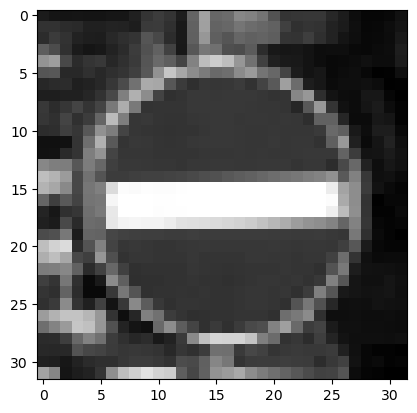

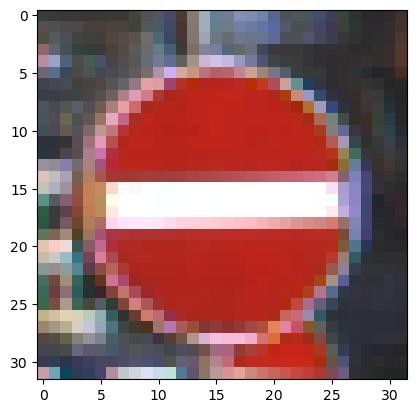

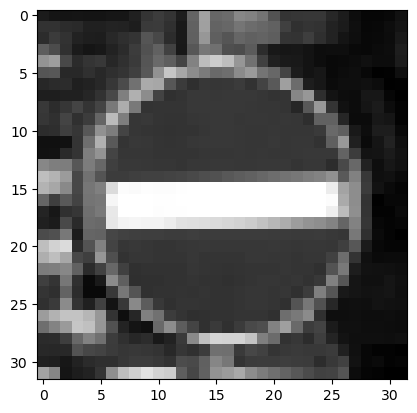

In [49]:
i = 1000
plt.imshow(X_test_grey[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_grey_norm[i].squeeze(),cmap = 'gray')

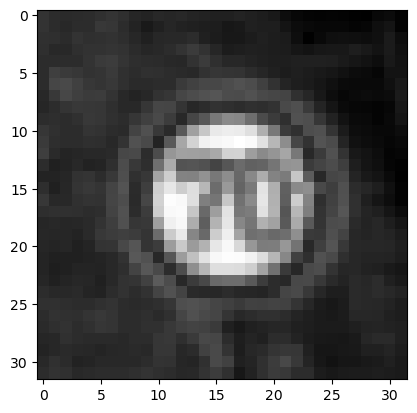

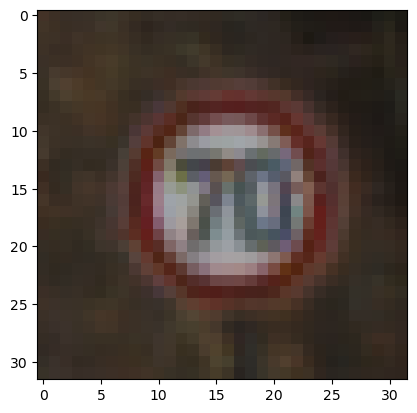

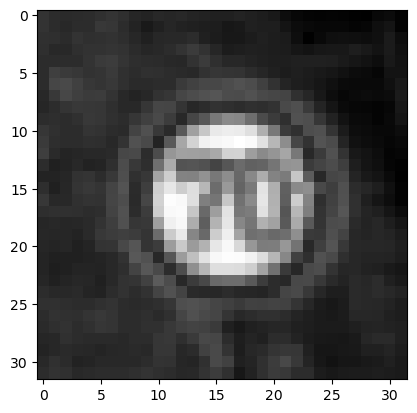

In [29]:
i = 1000
plt.imshow(X_validation_grey[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_grey_norm[i].squeeze(),cmap = 'gray')

## Import necessary libraries for Model Training.

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle

## Define the model architecture

In [25]:
cnn_model = Sequential()

# Input layer implicitly defined by specifying input_shape in the first layer
cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(2,2))

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D(2,2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation='softmax'))

## Compile the model

In [26]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

## Train the model

In [28]:
history= cnn_model.fit(X_train_grey_norm,
                       y_train,
                       batch_size=500,
                       epochs=50,
                       verbose=1,
                       validation_data=(X_validation_grey_norm,y_validation))


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.1095 - loss: 3.4525 - val_accuracy: 0.3549 - val_loss: 2.5255
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5009 - loss: 1.8561 - val_accuracy: 0.6259 - val_loss: 1.3629
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7289 - loss: 0.9733 - val_accuracy: 0.7327 - val_loss: 0.9268
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8163 - loss: 0.6527 - val_accuracy: 0.7741 - val_loss: 0.7496
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8655 - loss: 0.4998 - val_accuracy: 0.7878 - val_loss: 0.6885
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8902 - loss: 0.4122 - val_accuracy: 0.8156 - val_loss: 0.6333
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9057 - loss: 0.3518 - val_accuracy: 0.8338 - val_loss: 0.5794
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9199 - loss: 0.3122 - val_accuracy: 0.8358 - v

## Evaluate model on test set

In [29]:
score=cnn_model.evaluate(X_test_grey_norm,y_test)
print('Test Acuuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8790 - loss: 0.9905
Test Acuuracy: 0.8791765570640564


## Identify the Evaluation Keys

In [30]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Plotting Training and Validation Accuracy

In [31]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


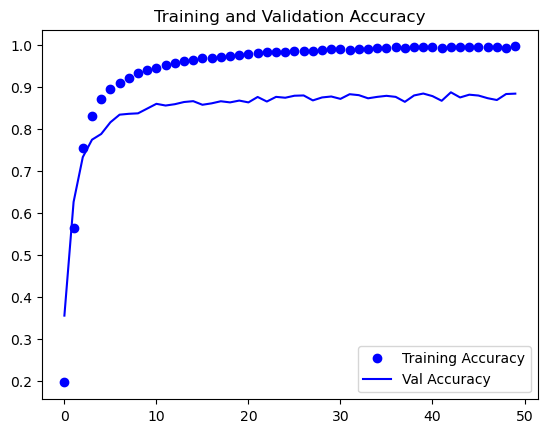

In [32]:
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

## Plotting Training and Validation Loss

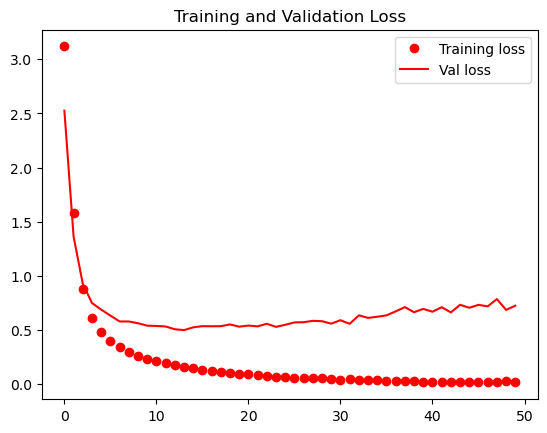

In [33]:
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Val loss')
plt.title("Training and Validation Loss")

plt.legend()

## Confusion Matrix for Model Prediction

In [34]:
predicted_classes = cnn_model.predict(X_test_grey_norm)
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


<Axes: >

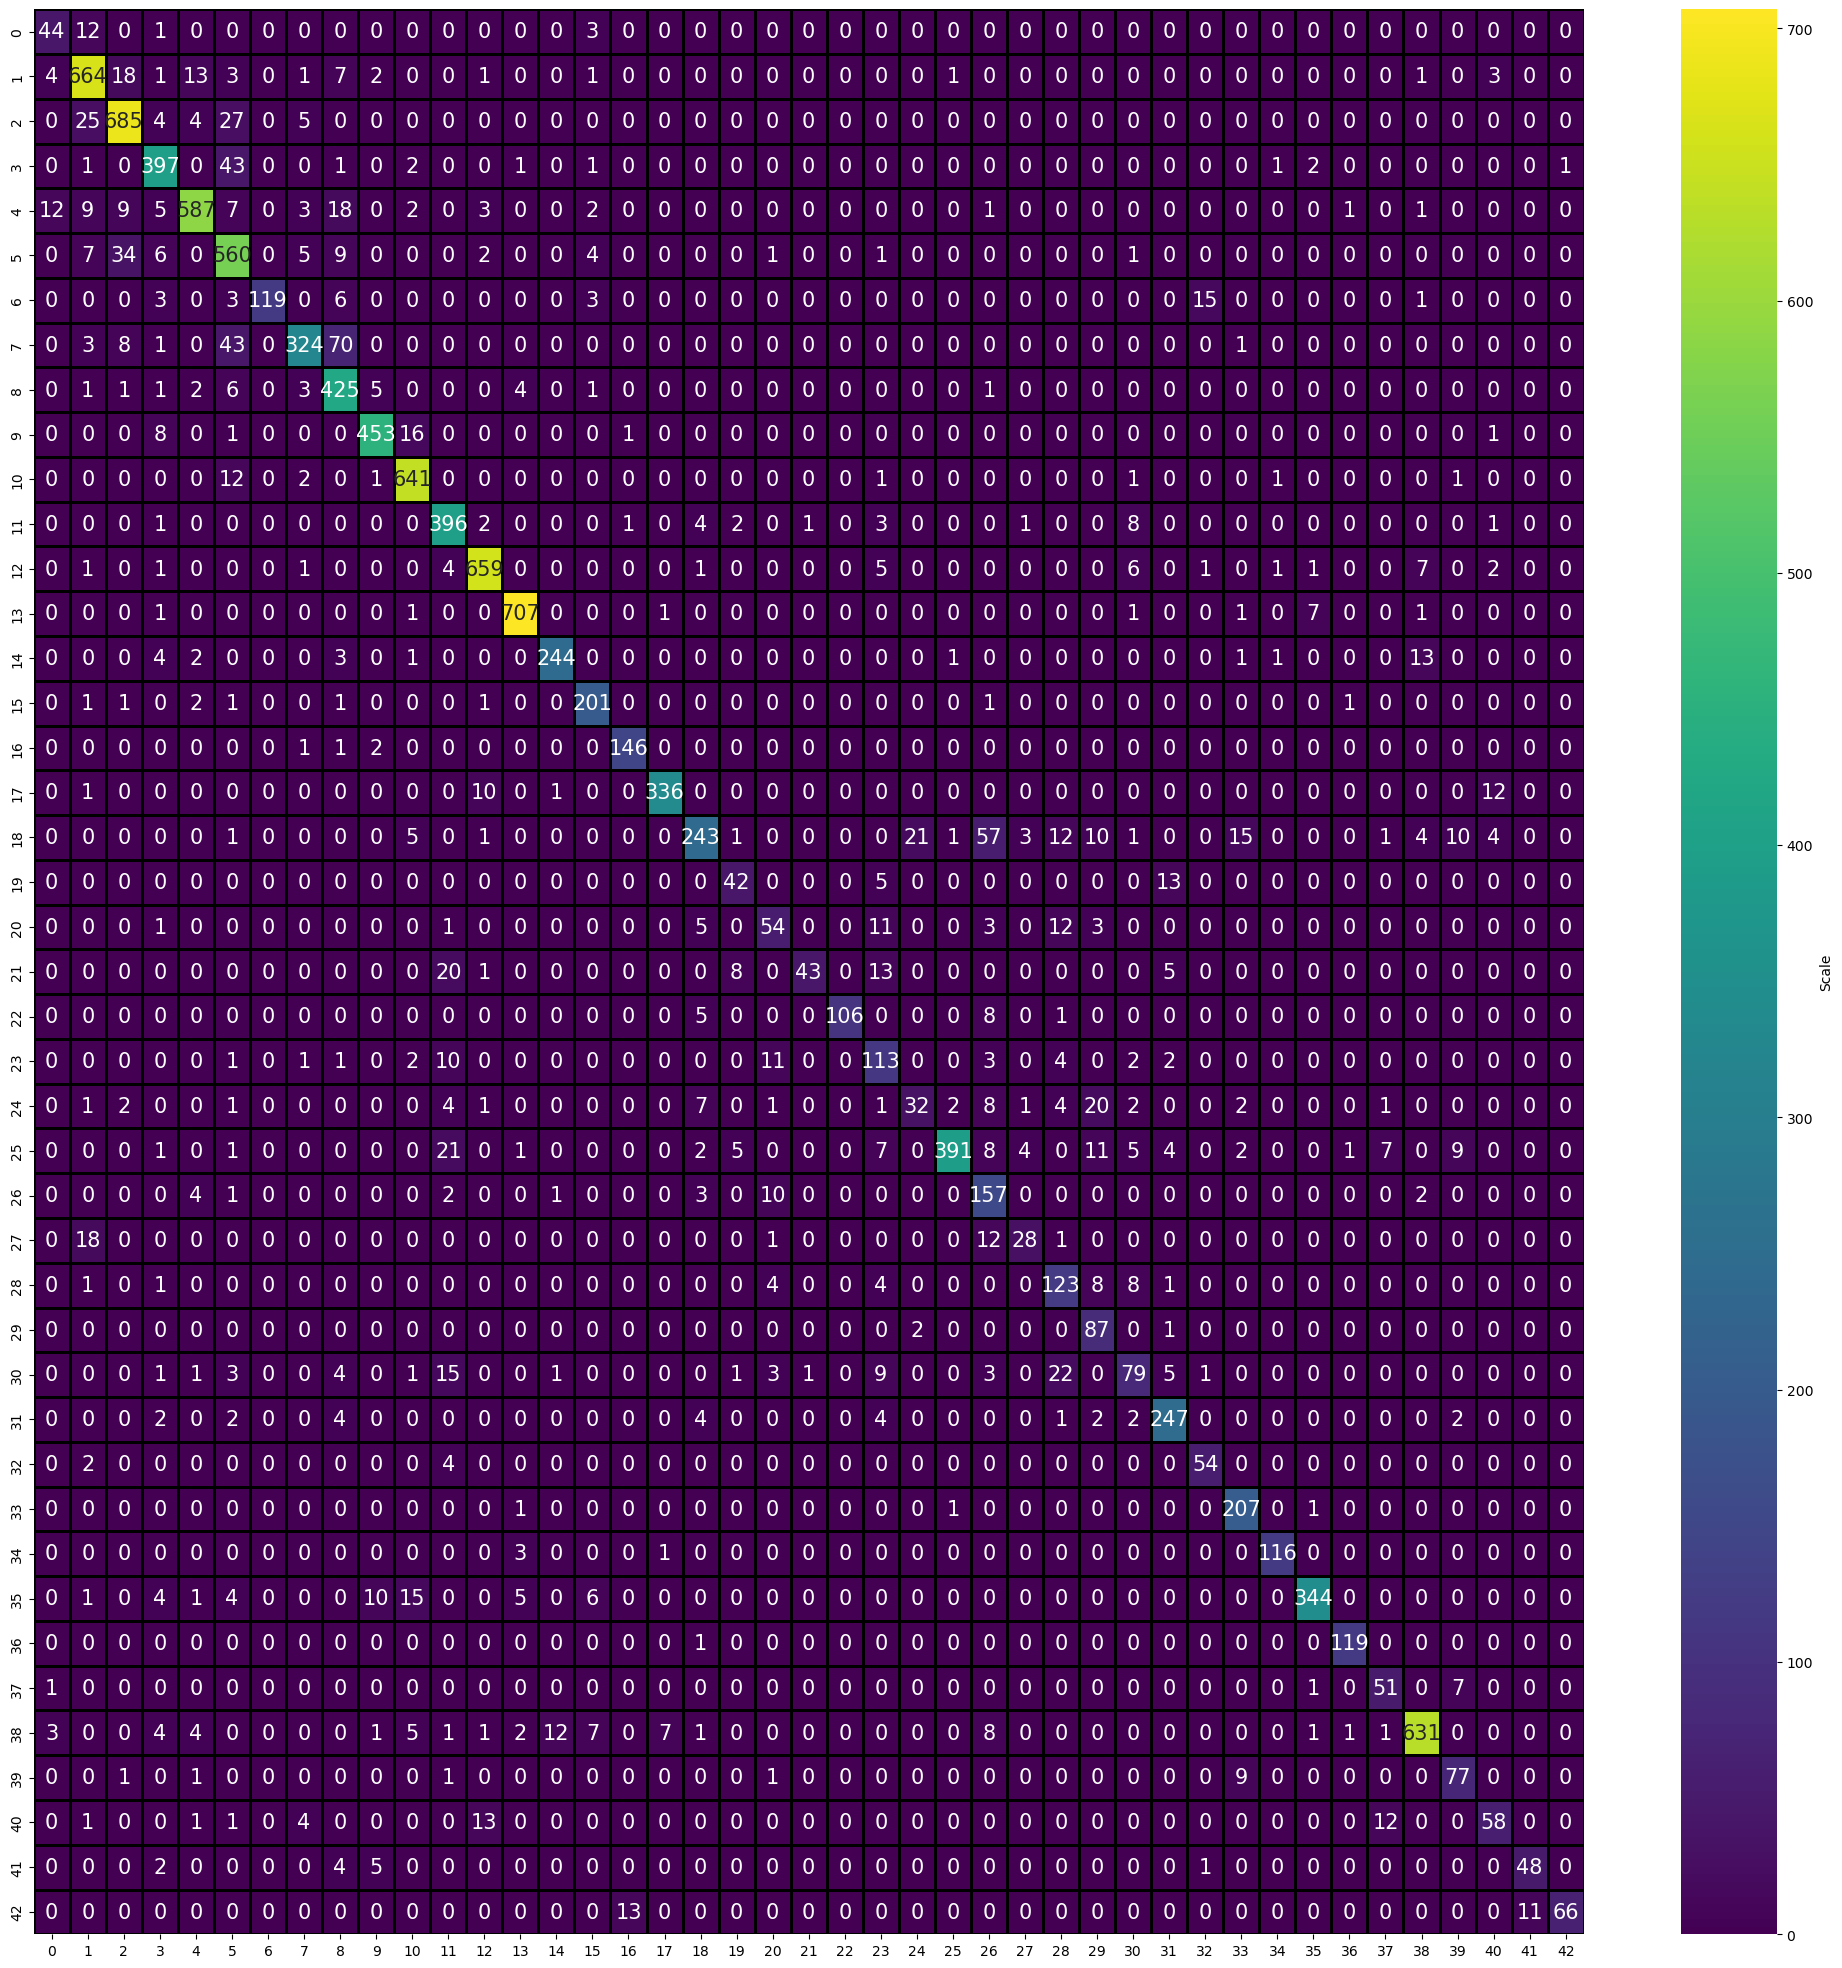

In [35]:
from sklearn.metrics import confusion_matrix
predicted_classes = np.argmax(predicted_classes, axis=1)
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Scale'}, annot_kws={"size": 15}, linewidths=1, linecolor='black')

## Visualizing Model Predictions in subplots

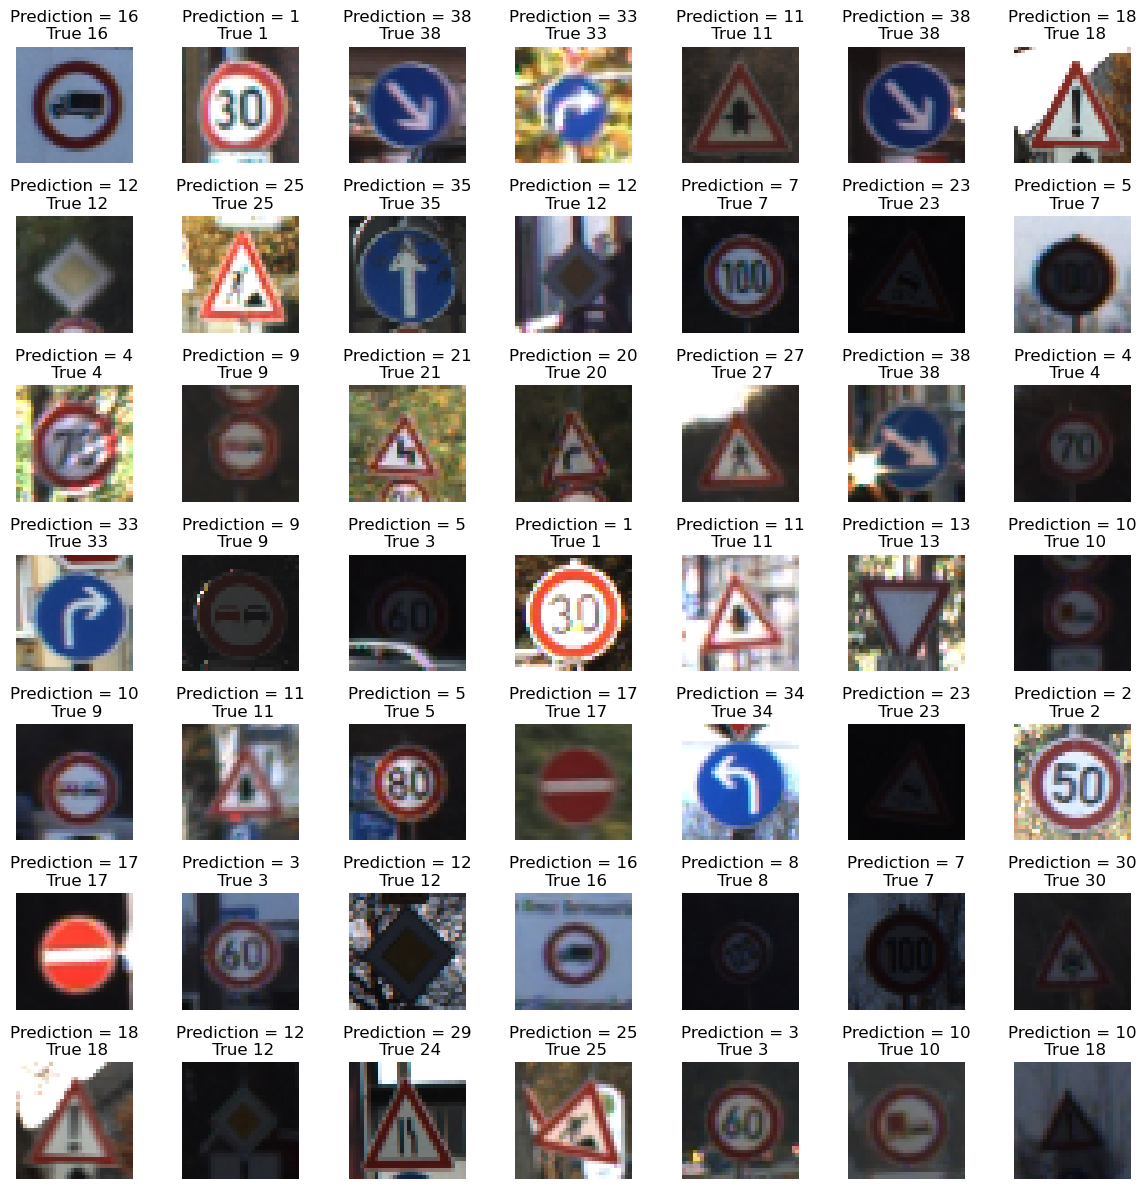

In [36]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].set_title('Prediction = {}\n True {}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')  # Turn off axis for better visualization

plt.subplots_adjust(wspace = 0)
plt.tight_layout()
plt.show()

## Save the trained model in the native Keras format

In [39]:

cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.save("cnn_model.keras")


## Load the saved model

In [41]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam


model = tf.keras.models.load_model("cnn_model.keras")

# Re-compile the model with a fresh optimizer
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# The model is now ready for evaluation or further training


##  Dictionary to map class numbers to their respective names

In [42]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


class_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}

## Code to Upload and Preprocess Image

In [43]:
def get_class_name(class_id):
    return class_names.get(class_id, "Unknown Class")

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32), color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = (img - 128) / 128  # Normalize the image
    return img

## Code to Predict Class of Uploaded Image

In [44]:
def predict_image(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    class_name = get_class_name(predicted_class)
    return predicted_class, class_name

def plot_image_with_prediction(img_path):
    predicted_class, class_name = predict_image(img_path)
    img = image.load_img(img_path, target_size=(32, 32), color_mode='grayscale')
    plt.imshow(img, cmap='gray')
    plt.title(f'Prediction: {class_name} ({predicted_class})')
    plt.axis('off')
    plt.show()

## Get Input from User and Predict Traffic Sign 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


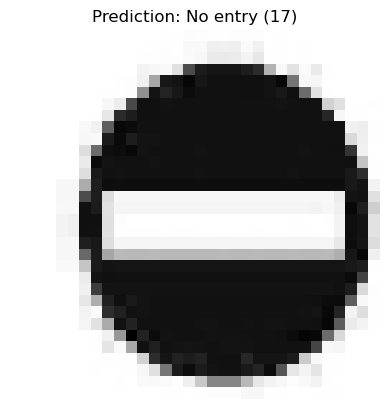

In [45]:
img_path = r"C:\Users\SEC\Downloads\Screenshot_9-7-2024_194831_www.godigit.com.jpeg"  # Replace with the path to your image
plot_image_with_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


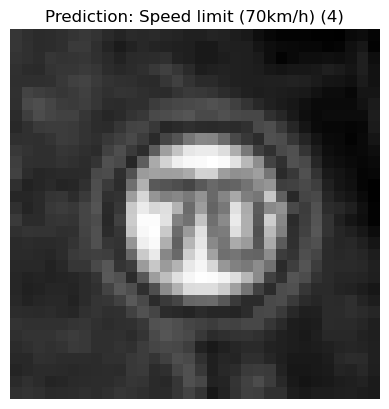

In [46]:
img_path = r"C:\Users\SEC\Pictures\Screenshots\Screenshot 2024-07-09 200001.png"  # Replace with the path to your image
plot_image_with_prediction(img_path)